# Scenario 4

The National Archives of Singapore is preparing an exhibition about the evolution of parliamentary debate in Singapore, and wants to do a feature on Committee of Supply (COS) debates2 in recent years.
It has tasked your team to summarise common topics from COS debates that took place within the last Parliament (13th), as well as identify MPs who asked questions frequently about each topic. (Sample codes written in R / Python are provided at this end of this document to demonstrate the process of scraping text from the Parliament website. You may use them—with any necessary modification for your use
case—or write your own code in your preferred language for the task.)

In [1]:
import pandas as pd
import datetime as datetime
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from utils import moderate_text_cleaning


In [2]:
df = pd.read_json('./scraped_data/data.json')
print(df.columns) 

Index(['Sitting Date', 'Section Name', 'MPs Speaking', 'Content'], dtype='object')


In [3]:
print(df.dtypes)

Sitting Date    object
Section Name    object
MPs Speaking    object
Content         object
dtype: object


In [4]:
df.head()

,Sitting Date,Section Name,MPs Speaking,Content
0,7-2-2017,Oral Answers to Questions,"[The Minister for Manpower (Mr Lim Swee Say), ...",1Dr Tan Wu Mengaskedthe Minister for Manpower ...
1,3-3-2020,Budget,"[Mr Douglas Foo (Nominated Member), Mr Patric...","The Chairman: Head S, Ministry of Manpower, Mr..."
2,28-2-2020,Budget,[The Senior Minister of State for Law (Mr Edwi...,"The Chairman: Head R, Ministry of Law. Mr Chri..."
3,6-3-2019,Oral Answers to Questions,[The Senior Parliamentary Secretary to the Min...,The following question stood in the name ofMs ...
4,6-3-2018,Budget,"[Mr Pritam Singh (Aljunied), Mr Melvin Yong Yi...",Growing Pains in TransportMr Sitoh Yih Pin (Po...


In [5]:
df['Sitting Date'] = pd.to_datetime(df['Sitting Date'], dayfirst = True)

In [6]:

df['Content'] = df['Content'].apply(lambda x: moderate_text_cleaning(x))
df['Section Name'] = df['Section Name'].apply(lambda x: moderate_text_cleaning(x))

In [7]:
df.head()

,Sitting Date,Section Name,MPs Speaking,Content
0,2017-02-07,oral answers questions,"[The Minister for Manpower (Mr Lim Swee Say), ...",dr tan wu mengaskedthe minister manpower wheth...
1,2020-03-03,budget,"[Mr Douglas Foo (Nominated Member), Mr Patric...",chairman head ministry manpower patrick tay fa...
2,2020-02-28,budget,[The Senior Minister of State for Law (Mr Edwi...,chairman head r ministry law christopher de so...
3,2019-03-06,oral answers questions,[The Senior Parliamentary Secretary to the Min...,following question stood name ofms anthea ong ...
4,2018-03-06,budget,"[Mr Pritam Singh (Aljunied), Mr Melvin Yong Yi...",growing pains transportmr sitoh yih pin potong...


In [8]:
def generate_wordcloud(text):
    # Create and configure the WordCloud object
    wordcloud = WordCloud(width=800, height=800, 
                          background_color='white',
                          stopwords=STOPWORDS,
                          min_font_size=10).generate(text)

    # Plot the WordCloud image                        
    plt.figure(figsize=(8, 8), facecolor=None) 
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.tight_layout(pad=0)
    
    plt.show()

In [9]:
full_content_text = ' '.join(df['Content'])

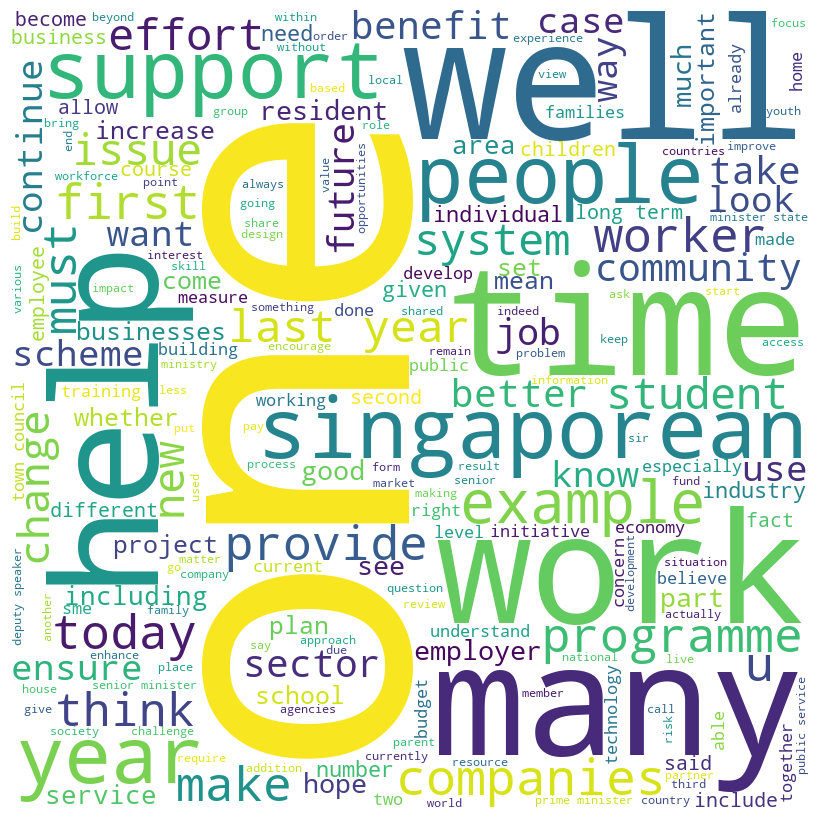

In [10]:
generate_wordcloud(full_content_text)

In [11]:
df.to_csv('./cleaned_text.csv', index=False)